# YJN2: rib

Saang Bum Kim <br>
2020-07-01 17:50

In [ ]:
function [model,sb] = rib_200915(varargin)
%
% [model,sb] = rib_200915(varargin)
%
% Model exported on Sep 16 2020, 18:03 by COMSOL 5.5.0.359.

In [1]:
% !comsol mphserver -silent &

[1] 21693



In [1]:
%
%%  PART 0.     Opening
%
% fclose all; close all
% clc
% clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/wtt/yjn2/';

p_comsol = 2036;
seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;


MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*


# Smilarity

## Blockage ratio

$$\mathrm{
% \begin{empheq}[left=\empheqlbrace]{align}
\left\{
\begin{aligned}\mathrm{
 < 3 - 5 \% : recommended \\
 < 10 \% : Dr. Kwon, Dae \, Kun \\
 > 10 \% : correction}
\end{aligned}
\right.
% \end{empheq}
}$$

## Small wind tunnel for 2d section models

- Wind.wtt.s.B = 4.5 m = 1.5 + 3
- Wind.wtt.s.D = 1.5 m
  - 5% = 0.15/2 = 0.075
  - 3% = 0.015*3 = 0.045
  - 2% = 0.015*2 = 0.03
- Wind.wtt.s.d = .04 m

## Reynold Number

In [2]:
% 0.04*sc = 2.5
sb.scale = 2.5/0.04;

In [3]:
sb.B = 8.5/sb.scale;
sb.B = 8352.385221/1000/sb.scale;
sb.D = 2.5/sb.scale;

In [4]:
sb


sb = 

  struct with fields:

    scale: 62.5000
        B: 0.1336
        D: 0.0400



$$\mathrm{
\mathfrak{R\!\:\!e} = \frac{\rho \, U \, D}{\mu} \\
\mathfrak{S\!\:\!t} = \frac{f \, D}{U}
}$$

In [5]:
Wind = m_wind;
sb.Re = 150;
% Wind.air.mu(273.15+15)
% Wind.air.rho(101325, 273.15+15)
sb.U = @(rey_n) (rey_n * Wind.air.mu(273.15+15) / Wind.air.rho(101325, 273.15+15) / sb.D);
sb.U(sb.Re)
sb.T_viv = @(rey_n) sb.B / sb.U(rey_n) / 0.2;
sb.T_viv(sb.Re)


ans =

    0.0548


ans =

   12.1977



In [34]:
sb.Re_target = Wind.air.rho(101325, 273.15+15) * 40 * sb.D / Wind.air.mu(273.15+15);
fprintf('Target Reynolds number = %e.\n',sb.Re_target)

Target Reynolds number = 1.095291e+05.


In [35]:
sb.Re_pool = [150, 1e3, 1e4, 1e5, 2e5];

# Placing Inlet and Outlet Boundaries for Exterior Flow

- In exterior flow applications, such as flow around vehicles and buildings, 
    the conditions far away from the obstacle are usually set to a constant velocity vector 
    on inlet boundaries and a constant pressure on outlet boundaries. 
- The question again arises as to what extent the distance from the obstacle 
    at which these conditions are applied influences the solution. 
- For exterior flow, it turns out that this distance varies with the spatial dimensions of the model. 
- For 2D models, the required distance is an order of magnitude larger than 
    for 3D and 2D axisymmetric models. 
- Once more, we look at ideal potential flow solutions to try to understand why this is so.
$$$$
- For exterior flow around an obstacle, 
    vorticity is created in boundary layers on the solid surface. 
- The boundary layers on different sides of the obstacle may merge at the trailing edge, 
    forming a thin sheet of vorticity that is advected downstream into a wake. 
- If the boundary layer on any side separates from the obstacle 
    due to an instability or the existence of a sharp convex corner, 
    the wake will be wider. 
- In either case, the vorticity that is shed downstream is confined to the wake 
    and the flow outside the wake is approximately irrotational.
$$$$
- A plot of the turbulent flow around an airfoil.

# Turbulent model

- L-VEL
- algebraic yPlus
- Spalart-Allmaras
- k-ε
- k-ω
- low Reynolds number k-ε
- SST
- v2-f

- Let’s start by considering the fluid flow over a flat plate, 
    as shown in the figure below. 
- The uniform velocity profile hits the leading edge of the flat plate, 
    and a laminar boundary layer begins to develop. 
- The flow in this region is very predictable. 
- After some distance, small chaotic oscillations begin to develop in the boundary layer 
    and the flow begins to transition to turbulence, eventually becoming fully turbulent.

![Flow of a fluid over a flat plate](Flow-of-a-fluid-over-a-flat-plate.png)

- The transition between these three regions can be defined in terms of the Reynolds number,
    where is the fluid density; is the velocity; is the characteristic length
    (in this case, the distance from the leading edge); and is the fluid’s dynamic viscosity. 
- We will assume that the fluid is Newtonian, 
    meaning that the viscous stress is directly proportional, 
    with the dynamic viscosity as the constant of proportionality, to the shear rate. 
- This is true, or very nearly so, for a wide range of fluids of engineering importance, 
    such as air or water. 
- Density can vary with respect to pressure, 
    although it is here assumed that the fluid is only weakly compressible, 
    meaning that the Mach number is less than about 0.3. 
- The weakly compressible flow option for the fluid flow interfaces 
    neglects the influence of pressure waves on the flow and pressure fields.

- In the laminar regime, 
    the fluid flow can be completely predicted by solving Navier-Stokes equations, 
    which gives the velocity and the pressure fields. 
- Let us first assume that the velocity field does not vary with time. 
- An example of this is outlined in The Blasius Boundary Layer tutorial model. 
- As the flow begins to transition to turbulence, 
    oscillations appear in the flow, 
    despite the fact that the inlet flow rate does not vary with time. 
- It is then no longer possible to assume that the flow is invariant with time. 
- In this case, it is necessary to solve the time-dependent Navier-Stokes equations, 
    and the mesh used must be fine enough to resolve the size of the smallest eddies in the flow. 
- Such a situation is demonstrated in the Flow Past a Cylinder tutorial model. 
- Note that the flow is unsteady, but still laminar in this model.

![Using-a-Reynolds-Averaged-Navier-Stokes-formulation](Using-a-Reynolds-Averaged-Navier-Stokes-formulation.png)

- As the flow rate — and thus also the Reynolds number — increases, 
    the flow field exhibits small eddies and the spatial and temporal scales of the oscillations 
    become so small that it is computationally unfeasible to resolve them 
    using the Navier-Stokes equations, 
    at least for most practical cases. 
- In this flow regime, we can use a Reynolds-averaged Navier-Stokes (RANS) formulation, 
    which is based on the observation that the flow field (u) over time contains small, 
    local oscillations (u’) and can be treated in a time-averaged sense (U). 
- For one- and two-equation models, 
    additional transport equations are introduced for turbulence variables, 
    such as the turbulence kinetic energy (k in k-ε and k-ω).

- In algebraic models, 
    algebraic equations that depend on the velocity field — and, 
- in some cases, on the distance from the walls — are introduced 
    in order to describe the <b>turbulence intensity</b>. 
- From the estimates for the turbulence variables, 
    an <b>eddy viscosity</b> that adds to the molecular viscosity of the fluid is calculated. 
- The momentum that would be transferred by the small eddies 
    is instead translated to a viscous transport. 
- Turbulence dissipation usually dominates over viscous dissipation everywhere, 
    except for in the viscous sublayer close to solid walls. 
- Here, the turbulence model has to continuously reduce the turbulence level, 
    such as in low Reynolds number models. 
- Or, new boundary conditions have to be computed using wall functions.

Low Reynolds Number Models

- The term “low Reynolds number model” sounds like a contradiction, 
    since flows can only be turbulent if the Reynolds number is high enough. 
- The notation “low Reynolds number” does not refer to the flow on a global scale, 
    but to the region close to the wall where viscous effects dominate; 
    i.e., the viscous sublayer in the figure above. 
- A low Reynolds number model is a model that correctly reproduces 
    the limiting behaviors of various flow quantities 
    as the distance to the wall approaches zero. 
- So, a low Reynolds number model must, for example, 
    predict that k~$y^2$ as y→0. 
- Correct limiting behavior means that 
    the turbulence model can be used to model the whole boundary layer, 
    including the viscous sublayer and the buffer layer.
$$$$
- Most ω-based models are low Reynolds number models by construction. 
- But the standard k-ε model and other commonly encountered k-ε models are 
    not low Reynolds number models. 
- Some of them can, however, be supplemented with so-called damping functions 
    that give the correct limiting behavior. 
- They are then known as low Reynolds number k-ε models.
$$$$
- Low Reynolds number models often give a very accurate description of the boundary layer. 
- The sharp gradients close to walls do, however, require very high mesh resolutions and that, in turn, 
    means that the high accuracy comes at a high computational cost. 
- This is why alternative methods to model the flow close to walls are often employed 
    for industrial applications.

Wall Functions

- The turbulent flow near a flat wall can be divided into four regions. 
- At the wall, the fluid velocity is zero, 
    and in a thin layer above this, the flow velocity is linear with distance from the wall. 
- This region is called the viscous sublayer, or laminar sublayer. 
$$$$
- Further away from the wall is a region called the buffer layer. 
- In the buffer region, turbulence stresses begin to dominate over viscous stresses and 
    it eventually connects to a region where the flow is fully turbulent 
    and the average flow velocity is related to the log of the distance to the wall. 
- This is known as the log-law region. 
$$$$
- Even further away from the wall, the flow transitions to the free-stream region. 
- The viscous and buffer layers are very thin and 
    if the distance to the end of the buffer layer is $\delta$, 
    then the log-law region will extend about $100 \delta$ away from the wall.

![Four-regimes-of-tubulent-flow](Four-regimes-of-tubulent-flow.png)

- It is possible to use a RANS model to compute the flow field in all four of these regions. 
- However, since the thickness of the buffer layer is so small, 
    it can be advantageous to use an approximation in this region. 
- Wall functions ignore the flow field in the buffer region 
    and analytically compute a nonzero fluid velocity at the wall. 
- By using a wall function formulation, 
    you assume an analytic solution for the flow in the viscous layer 
    and the resultant models will have significantly lower computational requirements. 
- This is a very useful approach for many practical engineering applications.

![Implementing-a-wall-function-formulation](Implementing-a-wall-function-formulation.png)

- If you need a level of accuracy beyond what the wall function formulations provide, 
    then you will want to consider a turbulence model 
    that solves the entire flow regime as described for the low Reynolds number models above. 
- For example, you may want to compute lift and drag on an object 
    or compute the heat transfer between the fluid and the wall.

Automatic Wall Treatment

- The automatic wall treatment functionality, 
    combines benefits from both wall functions and low Reynolds number models. 
- Automatic wall treatment adapts the formulation to the mesh available in the model 
    so that you get both robustness and accuracy. 
- For instance, for a coarse boundary layer mesh, 
    the feature will utilize a robust wall function formulation. 
- However, for a dense boundary layer mesh, 
    the automatic wall treatment will use a low Reynolds number formulation 
    to resolve the velocity profile completely to the wall.
$$$$
- Going from a low Reynolds number formulation 
    to a wall function formulation is a smooth transition. 
- The software blends the two formulations in the boundary elements. 
- Then, the software calculates the wall distance of the boundary elements’ grid points 
    (this is in viscous units given by a liftoff). 
- The combined formulations are then used for the boundary conditions.
$$$$
- All turbulence models, except the k-ε model, 
    support automatic wall treatment. 
- This means that the low Reynolds number models can be used for industrial applications 
    and that their low Reynolds number modeling capability is only invoked 
    when the mesh is fine enough.

About the Various Turbulence Models

- The eight RANS turbulence models differ in how they model the flow close to walls, 
    the number of additional variables solved for, 
    and what these variables represent. 
- All of these models augment the Navier-Stokes equations 
    with an additional turbulence eddy viscosity term, 
    but they differ in how it is computed.

L-VEL and yPlus

- The L-VEL and algebraic yPlus turbulence models compute 
    the eddy viscosity using algebraic expressions 
    based only on the local fluid velocity and the distance to the closest wall. 
- They do not solve any additional transport equations. 
- These models solve for the flow everywhere and are the most robust 
    and least computationally intensive of the eight turbulence models. 
- While they are generally the least accurate models, 
    they do provide good approximations for internal flow, 
    especially in electronic cooling applications.


Spalart-Allmaras

- The Spalart-Allmaras model adds a single additional variable 
    for an undamped kinematic eddy viscosity. 
- It is a low Reynolds number model and can resolve the entire flow field down to the solid wall. 
- The model was originally developed for aerodynamics applications 
    and is advantageous in that it is relatively robust and has moderate resolution requirements. 
- Experience shows that this model does not accurately compute fields 
    that exhibit shear flow, separated flow, or decaying turbulence. 
- Its advantage is that it is quite stable and shows good convergence.

k-ε

- The k-ε model solves for two variables: 
    - k, the turbulence kinetic energy; and 
    - ε (epsilon), the rate of dissipation of turbulence kinetic energy. 
- Wall functions are used in this model, 
    so the flow in the buffer region is not simulated. 
- The k-ε model has historically been very popular for industrial applications 
    due to its good convergence rate and relatively low memory requirements. 
- It does not very accurately compute flow fields that exhibit adverse pressure gradients, 
    strong curvature to the flow, or jet flow. 
- It does perform well for external flow problems around complex geometries. 
- For example, the k-ε model can be used to solve for the airflow around a bluff body.

$$$$

- The turbulence models listed below are all more nonlinear than the k-ε model 
    and they can often be difficult to converge unless a good initial guess is provided. 
- The k-ε model can be used to provide a good initial guess. 
- Just solve the model using the k-ε model and 
    then use the new Generate New Turbulence Interface functionality.

k-ω

- The k-ω model is similar to the k-ε model, 
    but it solves for ω (omega) — the specific rate of dissipation of kinetic energy. 
- It is a low Reynolds number model, but it can also be used in conjunction with wall functions. 
- It is more nonlinear, and thereby more difficult to converge than the k-ε model, 
    and it is quite sensitive to the initial guess of the solution. 
- The k-ω model is useful in many cases where the k-ε model is not accurate, 
    such as internal flows, flows that exhibit strong curvature, separated flows, and jets. 
- A good example of internal flow is flow through a pipe bend.

Low Reynolds Number k-ε

- The low Reynolds number k-ε model is similar to the k-ε model, 
    but does not need wall functions: it can solve for the flow everywhere. 
- It is a logical extension of the k-ε model and shares many of its advantages, 
    but generally requires a denser mesh; 
    not only at walls, but everywhere its low Reynolds number properties kick in and dampen the turbulence. 
- It can sometimes be useful to use the k-ε model 
    to first compute a good initial condition for solving the low Reynolds number k-ε model. 
- An alternative way is to use the automatic wall treatment 
    and start with a coarse boundary layer mesh to get wall functions 
    and then refine the boundary layer at the interesting walls 
    to get the low Reynolds number models.
$$$$
- The low Reynolds number k-ε model can compute lift and drag forces 
    and heat fluxes can be modeled with higher accuracy 
    compared to the k-ε model. 
- It has also shown to predict separation and reattachment quite well for a number of cases.

SST

- The SST model is a combination of the k-ε model in the free stream 
    and the k-ω model near the walls. 
- It is a low Reynolds number model and kind of the “go to” model 
    for industrial applications. 
- It has similar resolution requirements to the k-ω model 
    and the low Reynolds number k-ε model, 
    but its formulation eliminates some weaknesses displayed by pure k-ω and k-ε models. 
- In a tutorial model example, 
    the SST model solves for flow over a NACA 0012 Airfoil. 
- The results are shown to compare well with experimental data.

v2-f

- Close to wall boundaries, 
    the fluctuations of the velocity are usually much larger 
    in the parallel directions to the wall 
    in comparison with the direction perpendicular to the wall. 
- The velocity fluctuations are said to be anisotropic. 
- Further away from the wall, the fluctuations are of the same magnitude in all directions. 
- The velocity fluctuations become isotropic.
$$$$
- The v2-f turbulence model describes the anisotropy of the turbulence intensity 
    in the turbulent boundary layer using two new equations, 
    in addition to the two equations 
    for turbulence kinetic energy (k) and dissipation rate (ε). 
- The first equation describes the transport of turbulent velocity fluctuations normal to the streamlines. 
- The second equation accounts for nonlocal effects 
    such as the wall-induced damping of the redistribution of turbulence kinetic energy 
    between the normal and parallel directions.
$$$$
- You should use this model for enclosed flows over curved surfaces, 
    for example, to model cyclones.

Meshing Considerations for CFD Problems

- Solving for any kind of fluid flow problem — laminar or turbulent — is computationally intensive. 
- Relatively fine meshes are required and there are many variables to solve for. 
- Ideally, you would have a very fast computer with many gigabytes of RAM to solve such problems, 
    but simulations can still take hours or days for larger 3D models. 
- Therefore, we want to use as simple a mesh as possible, 
    while still capturing all of the details of the flow.
$$$$
- Referring back to the figure at the top of this blog post, 
    we can observe that for the flat plate (and for most flow problems), 
    the velocity field changes quite slowly in the direction tangential to the wall, 
    but quite rapidly in the normal direction, 
    especially if we consider the buffer layer region. 
- This observation motivates the use of a boundary layer mesh. 
- Boundary layer meshes 
    (which are the default mesh type on walls when using our physics-based meshing) 
    insert thin rectangles in 2D or triangular prisms in 3D at the walls. 
- These high-aspect-ratio elements will do a good job 
    of resolving the variations in the flow speed normal to the boundary, 
    while reducing the number of calculation points in the direction tangential to the boundary.

- The boundary layer mesh (magenta) around an airfoil 
    and the surrounding triangular mesh (cyan) for a 2D mesh.
- The boundary layer mesh (magenta) around a bluff body 
    and the surrounding tetrahedral mesh (cyan) for a 3D volumetric mesh.

Evaluating the Results of Your Turbulence Model

- Once you’ve used one of these turbulence models to solve your flow simulation, 
    you will want to verify that the solution is accurate. 
- Of course, as you do with any finite element model, 
    you can simply run it with finer and finer meshes 
    and observe how the solution changes with increasing mesh refinement. 
- Once the solution does not change to within a value you find acceptable, 
    your simulation can be considered converged with respect to the mesh. 
- However, there are additional values you need to check when modeling turbulence.
$$$$
- When using wall function formulations, 
    you will want to check the wall resolution viscous units 
    (this plot is generated by default). 
- This value tells you how far into the boundary layer your computational domain starts 
    and <b>should not be too large</b>. 
- You should consider refining your mesh in the wall normal direction 
    if there are regions where the wall resolution <b>exceeds several hundred</b>. 
- The second variable that you should check when using wall functions 
    is the <b>wall liftoff</b> (in length units). 
- This variable is related to the assumed thickness of the viscous layer 
    and should be small relative to the surrounding dimensions of the geometry. 
- If it is not, then you should refine the mesh in these regions as well.

- The maximum wall liftoff in viscous units is less than 100, 
    so there is no need to refine the boundary layer mesh.

- When solving a model using low Reynolds number wall treatment, 
    check the dimensionless distance to cell center (also generated by default). 
- This value should be of order unity everywhere for the algebraic models 
    and less than 0.5 for all two-equation models and the v2-f model. 
- If it is not, then refine the mesh in these regions.

Concluding Thoughts

- In this blog post, we have discussed the various turbulence models available in, 
    highlighting when and why you should use each one of them. 
- The real strength of the software is when you want to combine your fluid flow simulations with other physics,
    such as finding stresses on a solar panel in high winds, 
    forced convection modeling in a heat exchanger, or mass transfer in a mixer, among other possibilities.

- $k - \epsilon$: start
- $k - \epsilon$

- A further increase of the Reynolds number will raise the frequency of the eddies 
and finally result in turbulent flow. 
- Particularly in the transition regime, 
3D instabilities arise and must be resolved with a 3D laminar flow interface. 
- Once the flow gets fully turbulent, you can switch back to 2D and use a turbulent flow interface.

- y+ (wall lift off inviscous units) in a Low reynolds k-ep

- AMG

## Automatic Wall Treatment 

- Wall-bounded turbulent flows display extreme gradient close to the walls. 
- The most accurate way to treat these gradients 
    is to resolve them using a low Reynolds number model, 
    which is computationally expensive. 
- Industrial applications use wall functions, 
    which model the flow closest to the wall rather than resolving it. 
- Wall functions are robust and efficient, but not particularly accurate. 
- New automatic wall treatment functionality in the software 
    combines the benefits of wall functions and the low Reynolds number model.

How Automatic Wall Treatment Works

- The new automatic wall treatment functionality in 
    - combines the robustness of wall functions with the accuracy of low Reynolds number models
        by adapting the formulation to the mesh available in the model. 
- If the boundary layer mesh is coarse, 
    a robust wall function formulation is used. 
- If the boundary layer mesh is dense, 
    a low Reynolds number formulation is used, 
    which resolves the velocity profile all the way to the wall.
$$$$
- The transition between the low Reynolds number formulation and the wall function formulation 
    is smooth and is done by blending the two formulations in the boundary elements. 
- By calculating the wall distance of the boundary elements’ grid points 
    in viscous units given by a liftoff, 
    the combination of the two formulations is used for the boundary conditions.
$$$$
- The figure below exemplifies the transition between the low Reynolds number formulation 
    and the logarithmic wall functions for the low Re k-ε turbulence model. 
- The wall distance in viscous units, y+, 
    is plotted against the turbulence dissipation rate, ε. 
- The green curve represents the low Re formulation of ε, 
    the blue curve is the wall function representation, 
    while the red curve is the Wolfshtein model that is used for the automatic wall treatment. 
- Observe the smooth transition obtained with the Wolfshtein model (red) 
    for y+ values ranging from 1 to 20; i.e., in the buffer layer.

![low-Re-number-formulation-wall-functions-and-automatic-wall-treatment](low-Re-number-formulation-wall-functions-and-automatic-wall-treatment.png)
Low Re formulation (green), wall functions (blue), and automatic wall treatment (red).

- In order to verify the definition of a model, 
    we can investigate how the walls are treated by plotting the y+ variable at the boundaries, 
    as shown in the figure below. 
- For this pipe elbow benchmark model, 
    we can see that the low Reynolds number formulation dominates at the inner curved surface of the bend, 
    while at the straight sections of the pipe, the wall function formulation dominates.

- The deep red regions have a value of y+, or around 20, while the blue regions are at around 1.
- Addressing a Wide Range of Problems with Automatic Wall Treatment.
$$$$
- The functionality for automatic wall treatment 
    allows the use of low Reynolds number models for a wider range of problems. 
- Examples are coupled problems where certain surfaces are subjected 
    to flux of heat, chemical reactions, or fluid-structure interactions. 
- Instead of having to use a dense mesh on all surfaces, 
    which could be very computationally expensive, 
    we can apply a dense mesh only on the relevant surfaces 
    where we need to accurately resolve the boundary layer.
$$$$
- The figure below shows the boundary layer mesh for the solar panel model in the Application Library. 
- We can see that the mesh on the surface of the panels is dense with tight boundary elements. 
- On these surfaces, we need the forces exerted by the fluid on the structure with high accuracy 
    in order to compute the stresses and strains as well as the displacements. 
- The concrete base is not influenced by the forces of the wind and the forces on these surfaces 
    do not require the same accuracy. 
- The automatic wall treatment functionality allows for the solution of this problem 
    by just clicking the Compute button, 
    while a conventional low Reynolds number model would require a dense boundary layer mesh 
    on all boundaries in order to converge.

- In this fluid-structure interaction tutorial of a solar panel, 
    we can use a coarse boundary layer mesh for the ground and the concrete foundation 
    and a fine mesh on the surface of the panels, 
    where the forces need to be calculated with accuracy.

Simplified Model Development

- The new functionality is also of great use in model development. 
- In order to iron out the proper assumptions and boundary conditions, 
    we may need quick results on a coarse mesh as a first step. 
- Once we have verified our model formulation, 
    we can refine the mesh in order to obtain more accurate results. 
- The automatic wall treatment functionality allows for this type of model development 
    with a minimum number of obstacles and operations: 
    the “only” thing we need to do is to refine the mesh.
$$$$
- The robustness that this new functionality provides also simplifies 
    the use of low Reynolds number turbulence models in general. 
- A common procedure is to solve the model equations 
    using wall functions with high Reynolds number models 
    and then use this solution as the starting guess in the low Reynolds number models. 
- The adaptive wall treatment reduces this procedure 
    to the sequential solution of the model equations for a coarse and fine mesh; 
    i.e., it eliminates the need for the formulation 
    and solution of a high Reynolds number model as a first step.

Turbulent Flow Interfaces

Automatic wall treatment is available for all low Reynolds number turbulence model interfaces in the latest version of the CFD Module:

    k-ω
    Low Reynolds k-ε
    SST
    v2-f
    Spalart-Allmaras
    L-VEL
    Algebraic y+

The automatic wall treatment functionality is available in the Settings windows for all of the above-mentioned flow interfaces. The figure below shows the selection for the Turbulent Flow, k-ω interface. In this flow interface, we can select from three different wall treatment options: automatic, wall functions, and low Reynolds number.

In [ ]:
The three available options for the Turbulent Flow, k-ω interface: automatic, wall functions, and low Reynolds number.

In [ ]:
ahmed body

# Drag and Lift

- In fluid flow simulations, it is often important to evaluate the forces that the fluid exerts onto the body 
    — for example, 
    lift and drag forces on an airfoil or a car. 
- Engineers can use these body forces to quantify the efficiency and aerodynamic performance of designs. 
- Today, we will discuss different ways to compute lift and drag in.

Defining Lift and Drag

- When fluid flow passes a body, it will exert a force on the surface. 
- As shown in the figure below, 
    the force component that is perpendicular to the flow direction is called lift. 
- The force component that is parallel to the flow direction is called drag. 
- For simplicity, let’s assume that the flow direction is aligned with the coordinate system of the model. 
- Later on, we will show you how to compute the lift and drag forces in a direction 
    that is not aligned with the model coordinate system. 

- There are two distinct contributors to lift and drag forces 
    — pressure force and viscous force. 
- The pressure force, often referred to as pressure-gradient force, 
    is the force due to the pressure difference across the surface. 
- The viscous force is the force due to friction that acts in the opposite direction of the flow. 
- The magnitudes of pressure force and viscous force can vary significantly, depending on the type of flow. 
- The flow around a moving car, for instance, is often dominated by the pressure force.

- Simulation of airflow over an Ahmed body. 
- The surface plot shows the pressure distribution, 
- and the streamlines are colored by the velocity magnitude. 
- The arrow surface behind the Ahmed body shows the circulation in the wake zone.

In [ ]:
% Pressure Force 	spf.nymesh*p 	spf.nymesh*p
% Viscous Force 	-spf.K_stressy 	spf.rho*spf.u_tau*spf.u_tangy/spf.uPlus
% Total Force 	-spf.T_stressy 	spf.nymesh*p + spf.rho*spf.u_tau*spf.u_tangy/spf.uPlus

# Parameter Setting

In [ ]:
% wtt.

# Laminar

In [6]:
%
%%  PART II.    COMSOL
%
%
% cfd_2d_laminar_00.m
%
% Model exported on Sep 16 2020, 09:04 by COMSOL 5.5.0.359.

import com.comsol.model.*
import com.comsol.model.util.*

model = ModelUtil.create('Model');

model.modelPath('/home/sbkim/Work/git/openfoam_seo/wtt/yjn2');

model.component.create('comp1', true);

model.component('comp1').geom.create('geom1', 2);

model.component('comp1').mesh.create('mesh1');

model.component('comp1').physics.create('spf', 'LaminarFlow', 'geom1');

model.study.create('std1');
model.study('std1').create('stat', 'Stationary');
model.study('std1').feature('stat').activate('spf', true);

In [8]:
% mphsave(model,'rib_imsi')

In [7]:
% model.component('comp1').geom('geom1').create('imp1', 'Import');
% model.component('comp1').geom('geom1').feature('imp1').set('filename', ...
    % '/home/sbkim/Work/git/openfoam_seo/wtt/yjn2/yjn2_cfd_deck_200915.dxf');
% model.component('comp1').geom('geom1').runPre('fin');

model.component('comp1').geom('geom1').create('imp1', 'Import');
model.component('comp1').geom('geom1').feature('imp1').set('type', 'dxf');
% model.component('comp1').geom('geom1').feature('imp1').set('filename', ...
    % '/home/sbkim/Work/git/openfoam_seo/wtt/yjn2/yjn2_cfd_deck_200915.dxf');
% model.component('comp1').geom('geom1').feature('imp1').set('alllayers', ...
    % {'CS-DIML' 'CS-STEL-MAJR' 'dummy' '0' 'CENTER' 'CZ-SYMB' '3' '19 ' '1_CR-DEGN' '1'  ...
% '7' '6' ''});
model.component('comp1').geom('geom1').feature('imp1').set('filename', ...
    '/media/sbkim/2266B8F966B8CEB3/git/openfoam_seo/wtt/yjn2/yjn2_cfd_rib_200915.dxf');

model.component('comp1').geom('geom1').feature('imp1').set('knit', 'curve');
model.component('comp1').geom('geom1').create('csol1', 'ConvertToSolid');
% model.component('comp1').geom('geom1').feature('csol1').selection('input').set({ ...
    % 'imp1(2)' 'imp1(3)' 'imp1(4)' 'imp1(5)'});
model.component('comp1').geom('geom1').feature('csol1').selection('input').set({'imp1'});

In [8]:
model.component('comp1').geom('geom1').create('del1', 'Delete');
% model.component('comp1').geom('geom1').feature('del1').selection('input').set('imp1(1)', [1 3]);
% model.component('comp1').geom('geom1').feature('del1').selection('input').set('csol1(1)', [1 2 3 4 5 6 7 19 20 21 29 30 31 32 37 38 39 40 41 42 43 51 52 53 54 55 57 58 59 62 66 70 72 75 76 78 80 83 84 85 87 89 92 93 94 96 98 101 102 104 106 109 110 112 114 115 116 117 118 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 145 146 158 165 171 172 174 176 179 180 182 184 187 188 190 192 195 196 198 200 203 204 206 208 211 212 214 216 219 220 222 224 227 228 230 232 235 236 238 239 241 245 246 248 250 253 254 256 258 261 262 264 266 269 270 272 274 277 278 280 282 285 286 288 290 293 294 296 298 301 302 304 306 309 310 312 313 314 315 317 318 319 320 321 322 323 324 325 326 327 329 330 331 332 333 334 335 337 338 340 341 363 364 365 366 367 368 369 370 371 372 373 374 377 389 390 391 407 408 409 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 439 440 443 444 459 470 473 474 477 478 481 482 485 486 489 490 493 494 495 496 497 498 499 500 501 502 503 504 505 506 511 523 524 527 528 531 532 535 536 539 540 543 544 547 548 551 552 555 556 559 560 563 564 567 568 571 572 575 576 579 580 583 584 587 588 591 592 594 595 596 597 598 599 600 601 602 603 604 605 607 608 609 610 611 612]);

model.component('comp1').geom('geom1').feature('del1').selection('input').init(2);
model.component('comp1').geom('geom1').feature('del1').selection('input').set('csol1', [1 2 3 4 5 16 17 18 19 20]);
model.component('comp1').geom('geom1').run('del1');

% model.component('comp1').geom('geom1').measure.selection.init(2);
% model.component('comp1').geom('geom1').measure.selection.all('del1(1)');

model.component('comp1').geom('geom1').measure.selection.init(0);
model.component('comp1').geom('geom1').measure.selection.set('del1', [1 32]);

% 19959.15556 [m], (19959.15556, -8.381909993E-7) [m].
% Point 1 (del1(2)) to 320 (del1(2)).
% Average coordinates: (157333.0083, -1067.977166) [m].
% Points: 1, 320 (del1(2)).

% [Sep 17, 2020 4:20 AM]
% Distance: 8352.385221 [m], (8352.385221, 2.328852133E-8) [m].
% Point 1 (del1) to 32 (del1).
% Average coordinates: (157127.4098, 10384.96539) [m].  Points: 1, 32 (del1).

% [Sep 16, 2020 10:39 PM]
% Distance: 12347.59452 [m], (12347.59452, 4.946377885E-8) [m].
% Point 2 (csol1) to 63 (csol1). Average coordinates: (157127.4098, -11160.59134) [m].
% Points: 2, 63 (csol1).

In [9]:
model.component('comp1').geom('geom1').create('sca1', 'Scale');
model.component('comp1').geom('geom1').feature('sca1').set('factor', '1e-3');
% model.component('comp1').geom('geom1').feature('sca1').selection('input').set({'del1(1)' 'del1(2)'});
model.component('comp1').geom('geom1').feature('sca1').selection('input').set({'del1'});

model.component('comp1').geom('geom1').create('mov1', 'Move');
model.component('comp1').geom('geom1').feature('mov1').setIndex('displx', '-157.1274098', 0);
model.component('comp1').geom('geom1').feature('mov1').setIndex('disply', '-10.38496539', 0);
model.component('comp1').geom('geom1').feature('mov1').selection('input').set({'sca1'});

% out = model;

In [10]:
model.component('comp1').geom('geom1').create('sca2', 'Scale');
model.component('comp1').geom('geom1').feature('sca2').set('factor', sprintf('1/%d',sb.scale));
model.component('comp1').geom('geom1').feature('sca2').selection('input').set({'mov1'});

model.component('comp1').geom('geom1').create('mir1', 'Mirror');
model.component('comp1').geom('geom1').feature('mir1').selection('input').set({'sca2'});
model.component('comp1').geom('geom1').create('r1', 'Rectangle');
model.component('comp1').geom('geom1').feature('r1').set('pos', {'-1.5' '-1.5/2'});
model.component('comp1').geom('geom1').feature('r1').set('size', [4.5 1.5]);
model.component('comp1').geom('geom1').create('c1', 'Circle');
model.component('comp1').geom('geom1').feature('c1').set('pos', {'0' '.02'});
model.component('comp1').geom('geom1').feature('c1').set('r', 0.2);
model.component('comp1').geom('geom1').create('r2', 'Rectangle');
model.component('comp1').geom('geom1').feature('r2').set('pos', [-0.5 -0.5]);
model.component('comp1').geom('geom1').feature('r2').set('size', [2 1]);
model.component('comp1').geom('geom1').create('r3', 'Rectangle');
model.component('comp1').geom('geom1').feature('r3').set('pos', {'-.75/2' '-.75/2'});
model.component('comp1').geom('geom1').feature('r3').set('size', [1 0.75]);

In [26]:
% mphsave(model,'rib_imsi')

In [11]:
model.component('comp1').geom('geom1').create('co1', 'Compose');
% model.component('comp1').geom('geom1').feature('co1').set('formula', '(r1+c1+r2+r3)-(mir1(1)+mir1(2))');
% model.component('comp1').geom('geom1').feature('co1').selection('input').set({'r1' 'c1' 'r2' 'r3' 'mir1(1)' 'mir1(2)'});
model.component('comp1').geom('geom1').feature('co1').set('formula', '(r1+c1+r2+r3)-(mir1)');
model.component('comp1').geom('geom1').feature('co1').selection('input').set({'r1' 'c1' 'r2' 'r3' 'mir1'});

model.component('comp1').geom('geom1').run;

## material

In [12]:
model.component('comp1').material.create('mat1', 'Common');

In [13]:
model.component('comp1').material('mat1').propertyGroup('def').func.create('eta', 'Piecewise');
model.component('comp1').material('mat1').propertyGroup('def').func.create('Cp', 'Piecewise');
model.component('comp1').material('mat1').propertyGroup('def').func.create('rho', 'Analytic');
model.component('comp1').material('mat1').propertyGroup('def').func.create('k', 'Piecewise');
model.component('comp1').material('mat1').propertyGroup('def').func.create('cs', 'Analytic');
model.component('comp1').material('mat1').propertyGroup('def').func.create('an1', 'Analytic');
model.component('comp1').material('mat1').propertyGroup('def').func.create('an2', 'Analytic');
model.component('comp1').material('mat1').propertyGroup.create('RefractiveIndex', 'Refractive index');
model.component('comp1').material('mat1').propertyGroup.create('NonlinearModel', 'Nonlinear model');

In [14]:
model.component('comp1').material('mat1').label('Air');
model.component('comp1').material('mat1').set('family', 'air');

model.component('comp1').material('mat1').propertyGroup('def').func('eta').set('arg', 'T');
model.component('comp1').material('mat1').propertyGroup('def').func('eta').set('pieces', {'200.0' '1600.0' '-8.38278E-7+8.35717342E-8*T^1-7.69429583E-11*T^2+4.6437266E-14*T^3-1.06585607E-17*T^4'});
model.component('comp1').material('mat1').propertyGroup('def').func('eta').set('argunit', 'K');
model.component('comp1').material('mat1').propertyGroup('def').func('eta').set('fununit', 'Pa*s');

model.component('comp1').material('mat1').propertyGroup('def').func('Cp').set('arg', 'T');
model.component('comp1').material('mat1').propertyGroup('def').func('Cp').set('pieces', {'200.0' '1600.0' '1047.63657-0.372589265*T^1+9.45304214E-4*T^2-6.02409443E-7*T^3+1.2858961E-10*T^4'});
model.component('comp1').material('mat1').propertyGroup('def').func('Cp').set('argunit', 'K');
model.component('comp1').material('mat1').propertyGroup('def').func('Cp').set('fununit', 'J/(kg*K)');

model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('expr', 'pA*0.02897/R_const[K*mol/J]/T');
model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('args', {'pA' 'T'});
model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('dermethod', 'manual');
model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('argders', {'pA' 'd(pA*0.02897/R_const/T,pA)'; 'T' 'd(pA*0.02897/R_const/T,T)'});
model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('argunit', 'Pa,K');
model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('fununit', 'kg/m^3');
model.component('comp1').material('mat1').propertyGroup('def').func('rho').set('plotargs', {'pA' '0' '1'; 'T' '0' '1'});

model.component('comp1').material('mat1').propertyGroup('def').func('k').set('arg', 'T');
model.component('comp1').material('mat1').propertyGroup('def').func('k').set('pieces', {'200.0' '1600.0' '-0.00227583562+1.15480022E-4*T^1-7.90252856E-8*T^2+4.11702505E-11*T^3-7.43864331E-15*T^4'});
model.component('comp1').material('mat1').propertyGroup('def').func('k').set('argunit', 'K');
model.component('comp1').material('mat1').propertyGroup('def').func('k').set('fununit', 'W/(m*K)');

model.component('comp1').material('mat1').propertyGroup('def').func('cs').set('expr', 'sqrt(1.4*R_const[K*mol/J]/0.02897*T)');
model.component('comp1').material('mat1').propertyGroup('def').func('cs').set('args', {'T'});
model.component('comp1').material('mat1').propertyGroup('def').func('cs').set('dermethod', 'manual');
model.component('comp1').material('mat1').propertyGroup('def').func('cs').set('argunit', 'K');
model.component('comp1').material('mat1').propertyGroup('def').func('cs').set('fununit', 'm/s');
model.component('comp1').material('mat1').propertyGroup('def').func('cs').set('plotargs', {'T' '273.15' '373.15'});

model.component('comp1').material('mat1').propertyGroup('def').func('an1').set('funcname', 'alpha_p');
model.component('comp1').material('mat1').propertyGroup('def').func('an1').set('expr', '-1/rho(pA,T)*d(rho(pA,T),T)');
model.component('comp1').material('mat1').propertyGroup('def').func('an1').set('args', {'pA' 'T'});
model.component('comp1').material('mat1').propertyGroup('def').func('an1').set('argunit', 'Pa,K');
model.component('comp1').material('mat1').propertyGroup('def').func('an1').set('fununit', '1/K');
model.component('comp1').material('mat1').propertyGroup('def').func('an1').set('plotargs', {'pA' '101325' '101325'; 'T' '273.15' '373.15'});

model.component('comp1').material('mat1').propertyGroup('def').func('an2').set('funcname', 'muB');
model.component('comp1').material('mat1').propertyGroup('def').func('an2').set('expr', '0.6*eta(T)');
model.component('comp1').material('mat1').propertyGroup('def').func('an2').set('args', {'T'});
model.component('comp1').material('mat1').propertyGroup('def').func('an2').set('argunit', 'K');
model.component('comp1').material('mat1').propertyGroup('def').func('an2').set('fununit', 'Pa*s');
model.component('comp1').material('mat1').propertyGroup('def').func('an2').set('plotargs', {'T' '200' '1600'});

model.component('comp1').material('mat1').propertyGroup('def').set('thermalexpansioncoefficient', '');
model.component('comp1').material('mat1').propertyGroup('def').set('molarmass', '');
model.component('comp1').material('mat1').propertyGroup('def').set('bulkviscosity', '');
model.component('comp1').material('mat1').propertyGroup('def').set('thermalexpansioncoefficient', {'alpha_p(pA,T)' '0' '0' '0' 'alpha_p(pA,T)' '0' '0' '0' 'alpha_p(pA,T)'});
model.component('comp1').material('mat1').propertyGroup('def').set('molarmass', '0.02897[kg/mol]');
model.component('comp1').material('mat1').propertyGroup('def').set('bulkviscosity', 'muB(T)');

model.component('comp1').material('mat1').propertyGroup('def').descr('thermalexpansioncoefficient_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').descr('molarmass_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').descr('bulkviscosity_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('relpermeability', {'1' '0' '0' '0' '1' '0' '0' '0' '1'});
model.component('comp1').material('mat1').propertyGroup('def').descr('relpermeability_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('relpermittivity', {'1' '0' '0' '0' '1' '0' '0' '0' '1'});
model.component('comp1').material('mat1').propertyGroup('def').descr('relpermittivity_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('dynamicviscosity', 'eta(T)');
model.component('comp1').material('mat1').propertyGroup('def').descr('dynamicviscosity_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('ratioofspecificheat', '1.4');
model.component('comp1').material('mat1').propertyGroup('def').descr('ratioofspecificheat_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('electricconductivity', {'0[S/m]' '0' '0' '0' '0[S/m]' '0' '0' '0' '0[S/m]'});
model.component('comp1').material('mat1').propertyGroup('def').descr('electricconductivity_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('heatcapacity', 'Cp(T)');
model.component('comp1').material('mat1').propertyGroup('def').descr('heatcapacity_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('density', 'rho(pA,T)');
model.component('comp1').material('mat1').propertyGroup('def').descr('density_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('thermalconductivity', {'k(T)' '0' '0' '0' 'k(T)' '0' '0' '0' 'k(T)'});
model.component('comp1').material('mat1').propertyGroup('def').descr('thermalconductivity_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').set('soundspeed', 'cs(T)');
model.component('comp1').material('mat1').propertyGroup('def').descr('soundspeed_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('def').addInput('temperature');
model.component('comp1').material('mat1').propertyGroup('def').addInput('pressure');

model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('n', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('ki', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('n', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('ki', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('n', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('ki', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('n', {'1' '0' '0' '0' '1' '0' '0' '0' '1'});
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').set('ki', {'0' '0' '0' '0' '0' '0' '0' '0' '0'});
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').descr('n_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('RefractiveIndex').descr('ki_symmetry', '');

model.component('comp1').material('mat1').propertyGroup('NonlinearModel').set('BA', '(def.gamma+1)/2');
model.component('comp1').material('mat1').propertyGroup('NonlinearModel').descr('BA_symmetry', '');

## physics

In [130]:
model.component('comp1').selection.create('box1', 'Box');
model.component('comp1').selection('box1').set('entitydim', 1);
model.component('comp1').selection('box1').set('xmin', -0.15);
model.component('comp1').selection('box1').set('xmax', 0.15);
model.component('comp1').selection('box1').set('ymin', -0.1);
model.component('comp1').selection('box1').set('ymax', 0.12);

In [131]:
model.component('comp1').selection.create('box2', 'Box');
model.component('comp1').selection('box2').set('entitydim', 1);
model.component('comp1').selection('box2').set('xmin', -0.15);
model.component('comp1').selection('box2').set('xmax', 0);
model.component('comp1').selection('box2').set('ymin', -0.1);
model.component('comp1').selection('box2').set('ymax', 0.12);

model.component('comp1').selection.create('box3', 'Box');
model.component('comp1').selection('box3').set('entitydim', 1);
model.component('comp1').selection('box3').set('xmin', 0);
model.component('comp1').selection('box3').set('xmax', 0.15);
model.component('comp1').selection('box3').set('ymin', -0.1);
model.component('comp1').selection('box3').set('ymax', 0.12);

% model.component('comp1').physics.create('spf', 'LaminarFlow', 'geom1');

In [17]:
model.component('comp1').physics('spf').create('inl1', 'InletBoundary', 1);
model.component('comp1').physics('spf').feature('inl1').selection.set([1]);
model.component('comp1').physics('spf').create('out1', 'OutletBoundary', 1);
% model.component('comp1').physics('spf').feature('out1').selection.set([229]);
model.component('comp1').physics('spf').feature('out1').selection.set([36]);
model.component('comp1').physics('spf').create('sym1', 'Symmetry', 1);
model.component('comp1').physics('spf').feature('sym1').selection.set([2 3]);

In [18]:
sb.U_in = sb.U(150);

In [19]:
% model.component('comp1').physics('spf').prop('PhysicalModelProperty').set('IncludeGravity', true);
model.component('comp1').physics('spf').feature('inl1').set('U0in', sb.U_in);

## mesh

In [20]:
model.component('comp1').mesh('mesh1').create('bl1', 'BndLayer');
model.component('comp1').mesh('mesh1').create('fq2', 'FreeQuad');
model.component('comp1').mesh('mesh1').create('fq3', 'FreeQuad');
model.component('comp1').mesh('mesh1').create('fq1', 'FreeQuad');

In [21]:
model.component('comp1').mesh('mesh1').feature('bl1').selection.geom('geom1', 2);
model.component('comp1').mesh('mesh1').feature('bl1').selection.set([4]);
model.component('comp1').mesh('mesh1').feature('bl1').create('blp', 'BndLayerProp');
% model.component('comp1').mesh('mesh1').feature('bl1').feature('blp').selection.set([10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341]);

In [22]:
model.component('comp1').mesh('mesh1').feature('bl1').feature('blp').selection.named('box1');

model.component('comp1').mesh('mesh1').feature('fq2').selection.geom('geom1', 2);
model.component('comp1').mesh('mesh1').feature('fq2').selection.set([3]);
model.component('comp1').mesh('mesh1').feature('fq2').create('size1', 'Size');
model.component('comp1').mesh('mesh1').feature('fq2').feature('size1').set('table', 'cfd');

model.component('comp1').mesh('mesh1').feature('fq3').selection.geom('geom1', 2);
model.component('comp1').mesh('mesh1').feature('fq3').selection.set([2]);
model.component('comp1').mesh('mesh1').feature('fq3').create('size1', 'Size');
model.component('comp1').mesh('mesh1').feature('fq3').feature('size1').set('table', 'cfd');

model.component('comp1').mesh('mesh1').feature('fq1').selection.geom('geom1', 2);
model.component('comp1').mesh('mesh1').feature('fq1').selection.set([1]);
model.component('comp1').mesh('mesh1').feature('fq1').create('size1', 'Size');
model.component('comp1').mesh('mesh1').feature('fq1').feature('size1').set('table', 'cfd');

In [23]:
model.component('comp1').mesh('mesh1').feature('size').set('table', 'cfd');
% model.component('comp1').mesh('mesh1').feature('size').set('hauto', 3);
% model.component('comp1').mesh('mesh1').feature('size').set('hauto', 2);
model.component('comp1').mesh('mesh1').feature('size').set('hauto', 4);
model.component('comp1').mesh('mesh1').feature('fq2').feature('size1').set('hauto', 9);
model.component('comp1').mesh('mesh1').feature('fq3').feature('size1').set('hauto', 9);
model.component('comp1').mesh('mesh1').feature('fq1').feature('size1').set('hauto', 9);

model.component('comp1').mesh('mesh1').run;

In [ ]:
% model.study.create('std1');
% model.study('std1').create('stat', 'Stationary');

In [ ]:
% model.component('comp1').view('view1').axis.set('xmin', -1.7249999046325684);
% model.component('comp1').view('view1').axis.set('xmax', 3.2249999046325684);
% model.component('comp1').view('view1').axis.set('ymin', -1.3424468040466309);
% model.component('comp1').view('view1').axis.set('ymax', 1.3424468040466309);

In [31]:
% mphsave(model,'rib_imsi')

## Study

In [24]:
model.sol.create('sol1');
model.sol('sol1').study('std1');

In [25]:
model.study('std1').feature('stat').set('notlistsolnum', 1);
model.study('std1').feature('stat').set('notsolnum', '1');
model.study('std1').feature('stat').set('listsolnum', 1);
model.study('std1').feature('stat').set('solnum', '1');

In [26]:
model.sol('sol1').create('st1', 'StudyStep');
model.sol('sol1').feature('st1').set('study', 'std1');
model.sol('sol1').feature('st1').set('studystep', 'stat');
model.sol('sol1').create('v1', 'Variables');
model.sol('sol1').feature('v1').set('control', 'stat');

In [27]:
model.sol('sol1').create('s1', 'Stationary');
model.sol('sol1').feature('s1').feature('aDef').set('cachepattern', true);
model.sol('sol1').feature('s1').create('fc1', 'FullyCoupled');
model.sol('sol1').feature('s1').feature('fc1').set('initstep', 0.01);
model.sol('sol1').feature('s1').feature('fc1').set('minstep', 1.0E-4);
model.sol('sol1').feature('s1').feature('fc1').set('dtech', 'auto');
model.sol('sol1').feature('s1').feature('fc1').set('maxiter', 100);
model.sol('sol1').feature('s1').create('d1', 'Direct');
model.sol('sol1').feature('s1').feature('d1').set('linsolver', 'pardiso');
model.sol('sol1').feature('s1').feature('d1').set('pivotperturb', 1.0E-13);
model.sol('sol1').feature('s1').feature('d1').label('Direct, fluid flow variables (spf)');
model.sol('sol1').feature('s1').create('i1', 'Iterative');
model.sol('sol1').feature('s1').feature('i1').set('linsolver', 'gmres');
model.sol('sol1').feature('s1').feature('i1').set('prefuntype', 'left');
model.sol('sol1').feature('s1').feature('i1').set('itrestart', 50);
model.sol('sol1').feature('s1').feature('i1').set('rhob', 20);
model.sol('sol1').feature('s1').feature('i1').set('maxlinit', 200);
model.sol('sol1').feature('s1').feature('i1').set('nlinnormuse', 'on');
model.sol('sol1').feature('s1').feature('i1').label('AMG, fluid flow variables (spf)');
model.sol('sol1').feature('s1').feature('i1').create('mg1', 'Multigrid');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').set('prefun', 'saamg');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').set('mgcycle', 'v');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').set('maxcoarsedof', 80000);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').set('strconn', 0.02);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').set('usesmooth', false);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').set('saamgcompwise', true);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').create('sc1', 'SCGS');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('linesweeptype', 'ssor');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('iter', 0);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsrelax', 0.7);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsmethod', 'lines_vertices');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsvertexrelax', 0.7);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('seconditer', 1);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('relax', 0.5);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').create('sc1', 'SCGS');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('linesweeptype', 'ssor');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('iter', 1);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsrelax', 0.7);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsmethod', 'lines_vertices');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsvertexrelax', 0.7);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('seconditer', 1);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('po').feature('sc1').set('relax', 0.5);
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('cs').create('d1', 'Direct');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('cs').feature('d1').set('linsolver', 'pardiso');
model.sol('sol1').feature('s1').feature('i1').feature('mg1').feature('cs').feature('d1').set('pivotperturb', 1.0E-13);
model.sol('sol1').feature('s1').feature('fc1').set('linsolver', 'd1');
model.sol('sol1').feature('s1').feature('fc1').set('initstep', 0.01);
model.sol('sol1').feature('s1').feature('fc1').set('minstep', 1.0E-4);
model.sol('sol1').feature('s1').feature('fc1').set('dtech', 'auto');
model.sol('sol1').feature('s1').feature('fc1').set('maxiter', 100);
model.sol('sol1').feature('s1').feature.remove('fcDef');
model.sol('sol1').attach('std1');
model.result.dataset('dset1').set('geom', 'geom1');

In [75]:
if 0
model.result.create('pg1', 'PlotGroup2D');
model.result('pg1').label('Velocity (spf)');
model.result('pg1').set('frametype', 'spatial');
model.result('pg1').set('data', 'dset1');
model.result('pg1').feature.create('surf1', 'Surface');
model.result('pg1').feature('surf1').label('Surface');
model.result('pg1').feature('surf1').set('smooth', 'internal');
model.result('pg1').feature('surf1').set('data', 'parent');
model.result.create('pg2', 'PlotGroup2D');
model.result('pg2').label('Pressure (spf)');
model.result('pg2').set('frametype', 'spatial');
model.result('pg2').set('data', 'dset1');
model.result('pg2').feature.create('con1', 'Contour');
model.result('pg2').feature('con1').label('Contour');
model.result('pg2').feature('con1').set('expr', 'p');
model.result('pg2').feature('con1').set('number', 40);
model.result('pg2').feature('con1').set('levelrounding', false);
model.result('pg2').feature('con1').set('smooth', 'internal');
model.result('pg2').feature('con1').set('data', 'parent');
end

In [28]:
telap = toc(tcomp);
model.sol('sol1').runAll;
telap = toc(tcomp) - telap;
fprintf('Total elapsed time = %.3f s.\n',telap)

Total elapsed time = 4.772 s.


In [ ]:
% model.result('pg1').run;

## Post

In [84]:
if 0
model.result.numerical.create('int1', 'IntLine');
model.result.numerical('int1').set('intsurface', true);
% model.result.numerical('int1').selection.set([10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341]);
model.result.numerical('int1').selection.named('box1');
model.result.numerical('int1').set('expr', {'spf.T_stressx'});
model.result.numerical('int1').set('descr', {'Total stress, x component'});
model.result.numerical('int1').set('unit', {'N/m'});
model.result.table.create('tbl1', 'Table');
model.result.table('tbl1').comments('Line Integration 1');
model.result.numerical('int1').set('table', 'tbl1');
model.result.numerical('int1').setResult;
end

In [37]:
s_box = ['box',num2str(1)];
sb.res(1,1) = mphint2(model,'-spf.T_stressx / (1/2*spf.rho)','line','selection',s_box) / ((sb.U_in^2) * sb.D);
sb.res(1,2) = mphint2(model,'-spf.T_stressy / (1/2*spf.rho)','line','selection',s_box) / ((sb.U_in^2) * sb.D);
sb.res(1,3) = mphint2(model,'(-spf.T_stressx*y + -spf.T_stressy*-x) / (1/2*spf.rho)','line','selection',s_box) / ((sb.U_in^2) * sb.D^2);
fprintf('%f, %f, %f\n',sb.res(1,:))

1.051423, -0.241753, 0.055838


In [40]:
mphsave(model,sprintf('rib_upper_laminar_Re%d',sb.Re))
save(sprintf('rib_upper_laminar_Re%d',sb.Re),'sb')

# Laminar: Transient

In [42]:
model.study.create('std2');
model.study('std2').create('time', 'Transient');
model.study('std2').feature('time').activate('spf', true);
model.study('std2').feature('time').set('tlist', ...
    sprintf('range(0,0.1,.9)*%.2e range(1,1/2^6,2^4)*%.2e', sb.T_viv(150)*[1 1]));

model.sol.create('sol2');
model.sol('sol2').study('std2');

model.study('std2').feature('time').set('notlistsolnum', 1);
model.study('std2').feature('time').set('notsolnum', '1');
model.study('std2').feature('time').set('listsolnum', 1);
model.study('std2').feature('time').set('solnum', '1');

model.sol('sol2').create('st1', 'StudyStep');
model.sol('sol2').feature('st1').set('study', 'std2');
model.sol('sol2').feature('st1').set('studystep', 'time');
model.sol('sol2').create('v1', 'Variables');
model.sol('sol2').feature('v1').set('control', 'time');
model.sol('sol2').create('t1', 'Time');

model.sol('sol2').feature('t1').set('tlist', ...
    sprintf('range(0,0.1,.9)*%.2e range(1,1/2^6,2^4)*%.2e', sb.T_viv(150)*[1 1]));

model.sol('sol2').feature('t1').set('plot', 'off');
model.sol('sol2').feature('t1').set('plotgroup', 'Default');
model.sol('sol2').feature('t1').set('plotfreq', 'tout');
model.sol('sol2').feature('t1').set('probesel', 'all');
model.sol('sol2').feature('t1').set('probes', {});
model.sol('sol2').feature('t1').set('probefreq', 'tsteps');
model.sol('sol2').feature('t1').set('rtol', 0.005);
model.sol('sol2').feature('t1').set('atolglobalmethod', 'scaled');
model.sol('sol2').feature('t1').set('atolglobalfactor', 0.05);
model.sol('sol2').feature('t1').set('atolglobalvaluemethod', 'factor');
model.sol('sol2').feature('t1').set('atolmethod', {'comp1_p' 'scaled' 'comp1_u' 'global'});
model.sol('sol2').feature('t1').set('atolvaluemethod', {'comp1_p' 'factor' 'comp1_u' 'factor'});
model.sol('sol2').feature('t1').set('atolfactor', {'comp1_p' '1' 'comp1_u' '0.1'});
model.sol('sol2').feature('t1').set('estrat', 'exclude');
model.sol('sol2').feature('t1').set('rhoinf', 0.5);
model.sol('sol2').feature('t1').set('predictor', 'constant');
model.sol('sol2').feature('t1').set('maxorder', 2);
model.sol('sol2').feature('t1').set('stabcntrl', true);
model.sol('sol2').feature('t1').set('bwinitstepfrac', '0.01');
model.sol('sol2').feature('t1').set('control', 'time');

model.sol('sol2').feature('t1').feature('aDef').set('cachepattern', true);
model.sol('sol2').feature('t1').create('fc1', 'FullyCoupled');
model.sol('sol2').feature('t1').feature('fc1').set('jtech', 'once');
model.sol('sol2').feature('t1').feature('fc1').set('damp', 0.9);
model.sol('sol2').feature('t1').feature('fc1').set('stabacc', 'aacc');
model.sol('sol2').feature('t1').feature('fc1').set('aaccdim', 5);
model.sol('sol2').feature('t1').feature('fc1').set('aaccmix', 0.9);
model.sol('sol2').feature('t1').feature('fc1').set('aaccdelay', 1);
model.sol('sol2').feature('t1').feature('fc1').set('ntolfact', 0.5);
model.sol('sol2').feature('t1').feature('fc1').set('maxiter', 8);
model.sol('sol2').feature('t1').create('d1', 'Direct');
model.sol('sol2').feature('t1').feature('d1').set('linsolver', 'pardiso');
model.sol('sol2').feature('t1').feature('d1').set('pivotperturb', 1.0E-13);
model.sol('sol2').feature('t1').feature('d1').label('Direct, fluid flow variables (spf)');
model.sol('sol2').feature('t1').create('i1', 'Iterative');
model.sol('sol2').feature('t1').feature('i1').set('linsolver', 'gmres');
model.sol('sol2').feature('t1').feature('i1').set('prefuntype', 'left');
model.sol('sol2').feature('t1').feature('i1').set('itrestart', 50);
model.sol('sol2').feature('t1').feature('i1').set('rhob', 20);
model.sol('sol2').feature('t1').feature('i1').set('maxlinit', 50);
model.sol('sol2').feature('t1').feature('i1').set('nlinnormuse', 'on');
model.sol('sol2').feature('t1').feature('i1').label('AMG, fluid flow variables (spf)');
model.sol('sol2').feature('t1').feature('i1').create('mg1', 'Multigrid');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').set('prefun', 'saamg');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').set('mgcycle', 'v');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').set('maxcoarsedof', 80000);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').set('strconn', 0.02);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').set('usesmooth', false);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').set('saamgcompwise', true);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').create('sc1', 'SCGS');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('linesweeptype', 'ssor');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('iter', 0);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsrelax', 0.7);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsmethod', 'lines_vertices');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsvertexrelax', 0.7);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('seconditer', 1);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('relax', 0.5);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').create('sc1', 'SCGS');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('linesweeptype', 'ssor');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('iter', 1);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsrelax', 0.7);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsmethod', 'lines_vertices');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsvertexrelax', 0.7);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('seconditer', 1);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('relax', 0.5);
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('cs').create('d1', 'Direct');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('cs').feature('d1').set('linsolver', 'pardiso');
model.sol('sol2').feature('t1').feature('i1').feature('mg1').feature('cs').feature('d1').set('pivotperturb', 1.0E-13);
model.sol('sol2').feature('t1').feature('fc1').set('linsolver', 'd1');
model.sol('sol2').feature('t1').feature('fc1').set('jtech', 'once');
model.sol('sol2').feature('t1').feature('fc1').set('damp', 0.9);
model.sol('sol2').feature('t1').feature('fc1').set('stabacc', 'aacc');
model.sol('sol2').feature('t1').feature('fc1').set('aaccdim', 5);
model.sol('sol2').feature('t1').feature('fc1').set('aaccmix', 0.9);
model.sol('sol2').feature('t1').feature('fc1').set('aaccdelay', 1);
model.sol('sol2').feature('t1').feature('fc1').set('ntolfact', 0.5);
model.sol('sol2').feature('t1').feature('fc1').set('maxiter', 8);
model.sol('sol2').feature('t1').feature.remove('fcDef');
model.sol('sol2').attach('std2');
model.result.dataset('dset2').set('geom', 'geom1');

In [ ]:
if 0
model.result.create('pg1', 'PlotGroup2D');
model.result('pg1').label('Velocity (spf)');
model.result('pg1').set('frametype', 'spatial');
model.result('pg1').set('data', 'dset2');
model.result('pg1').feature.create('surf1', 'Surface');
model.result('pg1').feature('surf1').label('Surface');
model.result('pg1').feature('surf1').set('smooth', 'internal');
model.result('pg1').feature('surf1').set('data', 'parent');
model.result.create('pg2', 'PlotGroup2D');
model.result('pg2').label('Pressure (spf)');
model.result('pg2').set('frametype', 'spatial');
model.result('pg2').set('data', 'dset2');
model.result('pg2').feature.create('con1', 'Contour');
model.result('pg2').feature('con1').label('Contour');
model.result('pg2').feature('con1').set('expr', 'p');
model.result('pg2').feature('con1').set('number', 40);
model.result('pg2').feature('con1').set('levelrounding', false);
model.result('pg2').feature('con1').set('smooth', 'internal');
model.result('pg2').feature('con1').set('data', 'parent');
end

In [43]:
telap = toc(tcomp);
% model.sol('sol1').runAll;
model.sol('sol2').runAll;
telap = toc(tcomp) - telap;
fprintf('Total elapsed time = %.3f s.\n',telap)

Total elapsed time = 196.036 s.


In [68]:
t = [[0:0.1:.9]*sb.T_viv(150), [1:1/2^6:2^4]*sb.T_viv(150)]';

In [148]:
for ii=1:3
s_box = ['box',num2str(ii)];
y(1+(ii-1)*3,:) = mphint2(model, ...
    '-spf.T_stressx / (1/2*spf.rho)','line','selection',s_box, 'dataset','dset2') / ((sb.U_in^2) * sb.D);
y(2+(ii-1)*3,:) = mphint2(model, ...
    '-spf.T_stressy / (1/2*spf.rho)','line','selection',s_box, 'dataset','dset2') / ((sb.U_in^2) * sb.D);
y(3+(ii-1)*3,:) = mphint2(model, ...
    '(-spf.T_stressx*y + -spf.T_stressy*-x) / (1/2*spf.rho)','line','selection',s_box, ...
    'dataset','dset2') / ((sb.U_in^2) * sb.D);
end

In [82]:
n_t = floor(length(t)/2);
lc = n_t:n_t*2;
tn = t(lc);
d_t = mean(diff(tn))
std(diff(tn))


d_t =

    0.1906


ans =

   3.1377e-15



In [149]:
d_f = 1/n_t/d_t;
n_f = floor(n_t/2+1);
f = [0:n_f-1]*d_f;
yf = fft(y(:,lc)');

In [150]:
lc_fN_m = output(@() max(abs(yf(2:end,:))), 2)+1;

In [151]:
sb.res(3,1:9) = mean(y(:,lc)');
sb.res(3,10) = f(lc_fN_m(2))*sb.D/sb.U(150);
sb.res(3,11) = f(lc_fN_m(5))*sb.D/sb.U(150);
sb.res(3,12) = f(lc_fN_m(8))*sb.D/sb.U(150);
sb.res


ans =

  Columns 1 through 7

    1.0514   -0.2418    0.0558         0         0         0         0
    1.2206   -0.2494    0.0044    1.4405   -0.2741    0.0103   -0.2199
    1.2206   -0.2494    0.0044    1.4405   -0.2741    0.0103   -0.2199

  Columns 8 through 12

         0         0         0         0         0
    0.0247   -0.0059    0.1185    0.1185    0.1185
    0.0247   -0.0059    0.1185    0.1185    0.1185



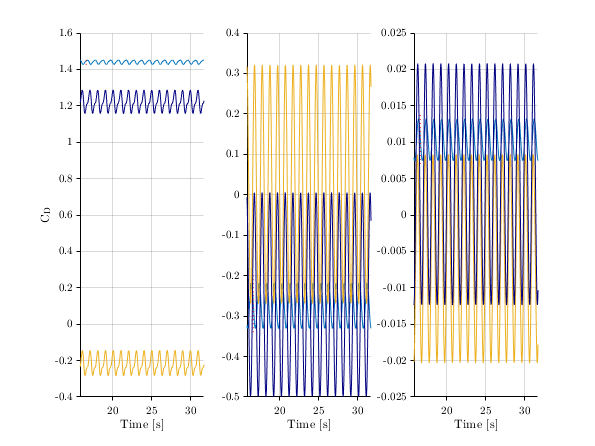

In [136]:
id_pause = true;
figure(1)
clf
for jj=[2,3,1]
for ii = 1:3
subplot(1,3,ii)
% plot(t*f(lc_fN_m(ii+(jj-1)*3)),y(ii+(jj-1)*3,:),'Color',rgb('Navy'))
if jj == 1
    plot(t*f(lc_fN_m(ii+(jj-1)*3)),y(ii+(jj-1)*3,:),'Color',rgb('Navy'))
else
    plot(t*f(lc_fN_m(ii+(jj-1)*3)),y(ii+(jj-1)*3,:))
end
if id_pause
xlabel('Time [s]')
end
end
if id_pause
gcfG;gcfH;gcfLFont;gcfS;%gcfP
ylabel('$\mathrm{C_D}$')
% gcfX([1,2^4]*sb.T_viv(150)*f(lc_fN_m(2)))
gcfX([2^3,2^4]*sb.T_viv(150)*f(lc_fN_m(2)))
% end
% if id_pause
id_pause = false;
for ii = 1:3
subplot(1,3,ii)
yl = ylim;
plot([1 1]*tn(1)*f(lc_fN_m(ii+(jj-1)*3)), yl, 'r:')
% ylim(yl)
end
end
end

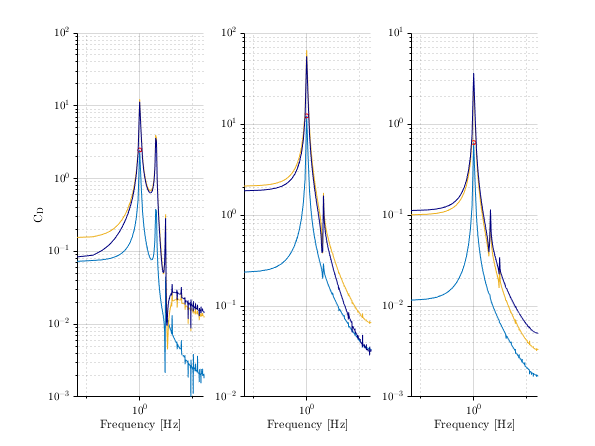

In [138]:
id_pause = true;
figure(2)
clf
for jj=[2,3,1]
for ii = 1:3
subplot(1,3,ii)
% plot(t*f(lc_fN_m(ii+(jj-1)*3)),y(ii+(jj-1)*3,:),'Color',rgb('Navy'))
if jj == 1
    loglog(f/f(lc_fN_m(ii+(jj-1)*3)),abs(yf(1:n_f,ii+(jj-1)*3) ),'Color',rgb('Navy'))
else
    loglog(f/f(lc_fN_m(ii+(jj-1)*3)),abs(yf(1:n_f,ii+(jj-1)*3) ))
end
if id_pause
xlabel('Frequency [Hz]')
end
end
if id_pause
gcfG;gcfH;gcfLFont;gcfS;%gcfP
ylabel('$\mathrm{C_D}$')
% gcfX([1,2^4]*sb.T_viv(150)*f(lc_fN_m(2)))
% gcfX([2^3,2^4]*sb.T_viv(150)*f(lc_fN_m(2)))
% end
% if id_pause
id_pause = false;
for ii = 1:3
subplot(1,3,ii)
loglog(f(lc_fN_m(ii+(jj-1)*3))/f(lc_fN_m(ii+(jj-1)*3)), ...
    abs(yf(lc_fN_m(ii+(jj-1)*3),ii+(jj-1)*3)),'ro','MarkerSize',6-3)
end
end
end

In [143]:
mphsave(model,sprintf('rib_upper_laminarT_Re%d',sb.Re))
save(sprintf('rib_upper_laminarT_Re%d',sb.Re),'sb')

No comsol mphserver running or already connected!

sb = 

  struct with fields:

    scale: 62.5000
        B: 0.1336
        D: 0.0400


ans =

    0.0548


ans =

   12.1977

Target Reynolds number = 1.095291e+05.
Total elapsed time = 3.669 s.
1.051423, -0.241753, 0.055838
Total elapsed time = 197.324 s.

d_t =

    0.1906


ans =

   3.1377e-15


ans =

  Columns 1 through 7

    1.0514   -0.2418    0.0558         0         0         0         0
    1.2206   -0.2494    0.0044    1.4405   -0.2741    0.0103   -0.2199

  Columns 8 through 12

         0         0         0         0         0
    0.0247   -0.0059    0.1185    0.1185    0.1185



Error using rib_laminar_200917 (line 908)
Java exception occurred: 
Exception:
	com.comsol.util.exceptions.FlException: Unknown solution
Messages:
	Unknown solution.
	- Tag: sol3

Stack trace:
	at com.comsol.model.dbmodel.ModelEntityListDb.findObject(SourceFile:365)
	at com.comsol.model.dbmodel.ModelEntityDb.a(SourceFile:595)
	at com.comsol.model.dbmodel.ModelDb.sol(SourceFile:1720)
	at sun.reflect.GeneratedMethodAccessor44.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at com.comsol.bridge.command.b.a(SourceFile:145)
	at com.comsol.bridge.command.b.run(SourceFile:90)
	at com.comsol.bridge.command.i.execute(SourceFile:46)
	at com.comsol.bridge.command.j.d(SourceFile:719)
	at com.comsol.bridge.command.j.a(SourceFile:707)
	at com.comsol.bridge.command.j$3.a(SourceFile:608)
	at com.comsol.bridge.command.j$3.call(SourceFile:1)
	at java.util.concurrent.FutureTask.run(Futur

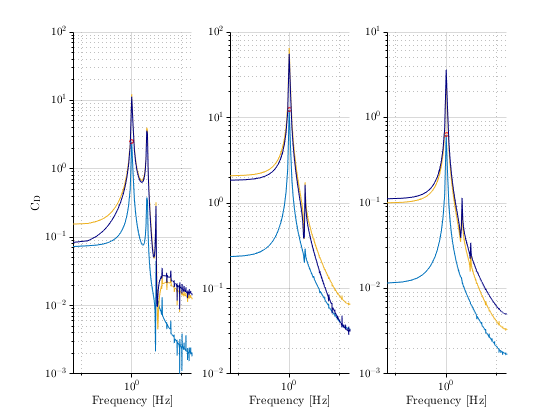

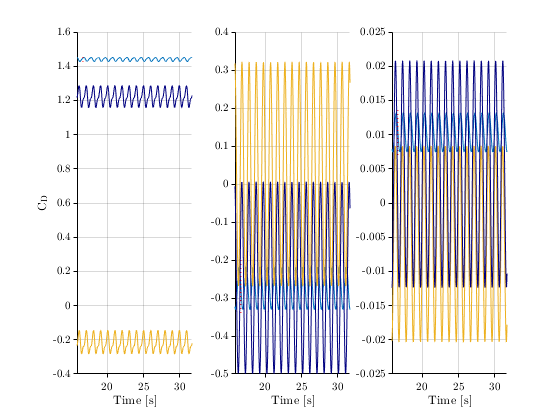

In [2]:
[model,sb] = rib_laminar_200917;
% model = mphload('rib_upper_laminarT_Re150n.mph');

In [ ]:
% init: Physics 
%   991      195.32     0.20997     2018  995 2018     2     0      0  3.8e-14  6.4e-16
% Time-stepping completed.
% Solution time: 198 s. (3 minutes, 18 seconds)
% Physical memory: 2.13 GB
% Virtual memory: 8.94 GB
% Ended at Sep 17, 2020 3:04:35 PM.
% ----- Time-Dependent Solver 1 in Study 2/Solution 2 (sol2) -------------------->

% init: from stationary
%  991      195.32     0.20997     2018  995 2018     2     0      0  3.4e-15  5.7e-16
% Time-stepping completed.
% Solution time: 203 s. (3 minutes, 23 seconds)
% Physical memory: 4.09 GB
% Virtual memory: 10.91 GB
% Ended at Sep 17, 2020 3:11:58 PM.
% ----- Time-Dependent Solver 1 in Study 2/Solution 2 (sol2) -------------------->

# Laminar: Transient: Velocity iteration

In [152]:
model.param.set('seo_U_in', '0.05[m/s]');
model.component('comp1').physics('spf').feature('inl1').set('U0in', 'seo_U_in');

model.study.create('std3');
model.study('std3').create('time', 'Transient');
model.study('std3').feature('time').activate('spf', true);
model.study('std3').feature('time').set('tlist', 'range(0,0.1,.9)*1.22e+01 range(1,1/2^6,2^4)*1.22e+01');

model.study('std3').feature('time').set('useinitsol', true);
model.study('std3').feature('time').set('initstudy', 'std2');
model.study('std3').feature('time').set('usesol', true);
model.study('std3').feature('time').set('notstudy', 'std2');
model.study('std3').feature('time').set('useparam', true);
model.study('std3').feature('time').setIndex('pname', 'seo_U_in', 0);
model.study('std3').feature('time').setIndex('plistarr', '', 0);
model.study('std3').feature('time').setIndex('punit', 'm/s', 0);
model.study('std3').feature('time').setIndex('pname', 'seo_U_in', 0);
model.study('std3').feature('time').setIndex('plistarr', '', 0);
model.study('std3').feature('time').setIndex('punit', 'm/s', 0);
model.study('std3').feature('time').setIndex('plistarr', '0.1 0.2', 0);

In [ ]:
model.sol('sol3').create('st1', 'StudyStep');
model.sol('sol3').feature('st1').set('study', 'std3');
model.sol('sol3').feature('st1').set('studystep', 'time');
model.sol('sol3').create('v1', 'Variables');
model.sol('sol3').feature('v1').set('control', 'time');
model.sol('sol3').create('t1', 'Time');
model.sol('sol3').feature('t1').set('tlist', 'range(0,0.1,.9)*1.22e+01 range(1,1/2^6,2^4)*1.22e+01');
model.sol('sol3').feature('t1').set('plot', 'off');
model.sol('sol3').feature('t1').set('plotgroup', 'pg1');
model.sol('sol3').feature('t1').set('plotfreq', 'tout');
model.sol('sol3').feature('t1').set('probesel', 'all');
model.sol('sol3').feature('t1').set('probes', {});
model.sol('sol3').feature('t1').set('probefreq', 'tsteps');
model.sol('sol3').feature('t1').set('rtol', 0.005);
model.sol('sol3').feature('t1').set('atolglobalmethod', 'scaled');
model.sol('sol3').feature('t1').set('atolglobalfactor', 0.05);
model.sol('sol3').feature('t1').set('atolglobalvaluemethod', 'factor');
model.sol('sol3').feature('t1').set('atolmethod', {'comp1_p' 'scaled' 'comp1_u' 'global'});
model.sol('sol3').feature('t1').set('atolvaluemethod', {'comp1_p' 'factor' 'comp1_u' 'factor'});
model.sol('sol3').feature('t1').set('atolfactor', {'comp1_p' '1' 'comp1_u' '0.1'});
model.sol('sol3').feature('t1').set('estrat', 'exclude');
model.sol('sol3').feature('t1').set('rhoinf', 0.5);
model.sol('sol3').feature('t1').set('predictor', 'constant');
model.sol('sol3').feature('t1').set('maxorder', 2);
model.sol('sol3').feature('t1').set('stabcntrl', true);
model.sol('sol3').feature('t1').set('bwinitstepfrac', '0.01');
model.sol('sol3').feature('t1').create('tp1', 'TimeParametric');
model.sol('sol3').feature('t1').feature.remove('tpDef');
model.sol('sol3').feature('t1').feature('tp1').set('control', 'time');
model.sol('sol3').feature('t1').set('control', 'time');
model.sol('sol3').feature('t1').feature('aDef').set('cachepattern', true);
model.sol('sol3').feature('t1').create('fc1', 'FullyCoupled');
model.sol('sol3').feature('t1').feature('fc1').set('jtech', 'once');
model.sol('sol3').feature('t1').feature('fc1').set('damp', 0.9);
model.sol('sol3').feature('t1').feature('fc1').set('stabacc', 'aacc');
model.sol('sol3').feature('t1').feature('fc1').set('aaccdim', 5);
model.sol('sol3').feature('t1').feature('fc1').set('aaccmix', 0.9);
model.sol('sol3').feature('t1').feature('fc1').set('aaccdelay', 1);
model.sol('sol3').feature('t1').feature('fc1').set('ntolfact', 0.5);
model.sol('sol3').feature('t1').feature('fc1').set('maxiter', 8);
model.sol('sol3').feature('t1').create('d1', 'Direct');
model.sol('sol3').feature('t1').feature('d1').set('linsolver', 'pardiso');
model.sol('sol3').feature('t1').feature('d1').set('pivotperturb', 1.0E-13);
model.sol('sol3').feature('t1').feature('d1').label('Direct, fluid flow variables (spf)');
model.sol('sol3').feature('t1').create('i1', 'Iterative');
model.sol('sol3').feature('t1').feature('i1').set('linsolver', 'gmres');
model.sol('sol3').feature('t1').feature('i1').set('prefuntype', 'left');
model.sol('sol3').feature('t1').feature('i1').set('itrestart', 50);
model.sol('sol3').feature('t1').feature('i1').set('rhob', 20);
model.sol('sol3').feature('t1').feature('i1').set('maxlinit', 50);
model.sol('sol3').feature('t1').feature('i1').set('nlinnormuse', 'on');
model.sol('sol3').feature('t1').feature('i1').label('AMG, fluid flow variables (spf)');
model.sol('sol3').feature('t1').feature('i1').create('mg1', 'Multigrid');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').set('prefun', 'saamg');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').set('mgcycle', 'v');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').set('maxcoarsedof', 80000);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').set('strconn', 0.02);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').set('usesmooth', false);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').set('saamgcompwise', true);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').create('sc1', 'SCGS');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('linesweeptype', 'ssor');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('iter', 0);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsrelax', 0.7);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsmethod', 'lines_vertices');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('scgsvertexrelax', 0.7);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('seconditer', 1);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('pr').feature('sc1').set('relax', 0.5);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').create('sc1', 'SCGS');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('linesweeptype', 'ssor');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('iter', 1);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsrelax', 0.7);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsmethod', 'lines_vertices');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('scgsvertexrelax', 0.7);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('seconditer', 1);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('po').feature('sc1').set('relax', 0.5);
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('cs').create('d1', 'Direct');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('cs').feature('d1').set('linsolver', 'pardiso');
model.sol('sol3').feature('t1').feature('i1').feature('mg1').feature('cs').feature('d1').set('pivotperturb', 1.0E-13);
model.sol('sol3').feature('t1').feature('fc1').set('linsolver', 'd1');
model.sol('sol3').feature('t1').feature('fc1').set('jtech', 'once');
model.sol('sol3').feature('t1').feature('fc1').set('damp', 0.9);
model.sol('sol3').feature('t1').feature('fc1').set('stabacc', 'aacc');
model.sol('sol3').feature('t1').feature('fc1').set('aaccdim', 5);
model.sol('sol3').feature('t1').feature('fc1').set('aaccmix', 0.9);
model.sol('sol3').feature('t1').feature('fc1').set('aaccdelay', 1);
model.sol('sol3').feature('t1').feature('fc1').set('ntolfact', 0.5);
model.sol('sol3').feature('t1').feature('fc1').set('maxiter', 8);
model.sol('sol3').feature('t1').feature.remove('fcDef');
model.sol('sol3').attach('std3');

In [153]:
mphsave(model,sprintf('rib_upper_laminarTa_Re%d',sb.Re))
save(sprintf('rib_upper_laminarTa_Re%d',sb.Re),'sb')

# FINE